# Test PySHBundle

In [1]:
import pandas as pd
import os
import xarray as xr
import numpy as np
import pkg_resources
import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
os.chdir('/media/abhishek/DATA/open_source/pyshbundle')
import pyshbundle

In [3]:
import pyshbundle.reader_replacer_jpl
import pyshbundle.read_GRACE_SH_paths
import pyshbundle.clm2sc
import pyshbundle.clm2cs

import pyshbundle.klm2sc
import pyshbundle.tws_cal
import pyshbundle.basin_avg

## Load Data

/media/abhishek/DATA/open_source/pyshbundle/sample_input_data/JPL_input <br>
/media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/JPL_TN_files/TN-13_GEOC_JPL_RL06.txt <br>
/media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/JPL_TN_files/TN-14_C30_C20_GSFC_SLR.txt

In [9]:
use_sample_files = 0
path_sh, path_tn13, path_tn14, source = pyshbundle.read_GRACE_SH_paths.read_GRACE_SH_paths(use_sample_files = use_sample_files)

This program supports working with GRACE L2 Spherical harmonics data from the following centers: CSR, JPL and ITSG
Instructions to download data may be referred to in https://github.com/mn5hk/pyshbundle/blob/main/docs/index.md#how-to-download-data
Successfully loaded TN13 and TN14 replacement files for JPL


Not using the `read_GRACE_SH_paths`, instead directly initializing the data paths to required variables

In [4]:
path_sh = '/media/abhishek/DATA/open_source/pyshbundle/sample_input_data/JPL_input'
path_tn13 = '/media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/JPL_TN_files/TN-13_GEOC_JPL_RL06.txt'
path_tn14 = '/media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/JPL_TN_files/TN-14_C30_C20_GSFC_SLR.txt'
source = 'jpl'

In [6]:
help(pyshbundle.read_GRACE_SH_paths.read_GRACE_SH_paths)

Help on function read_GRACE_SH_paths in module pyshbundle.read_GRACE_SH_paths:

read_GRACE_SH_paths(use_sample_files=0)
    Returns path of data files, path of tn13 and path of tn14 replacement files
    
    Args:
        use_sample_files (int, optional): _description_. Defaults to 0.
    
    Raises:
        Exception: _description_
    
    Returns:
        _type_: _description_



In [9]:
print(f"{path_sh}, \n {path_tn13},\n {path_tn14},\n {source}")

/media/abhishek/DATA/open_source/pyshbundle/sample_input_data/JPL_input, 
 /media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/JPL_TN_files/TN-13_GEOC_JPL_RL06.txt,
 /media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/JPL_TN_files/TN-14_C30_C20_GSFC_SLR.txt,
 jpl


Reading the files - Temporal data as well as replacement files

In [5]:
sh_clm, dates_start, dates_end, no_of_files = pyshbundle.reader_replacer_jpl.reader_replacer_jpl(path_sh, path_tn14, path_tn13)

JPL
Reading into clm format complete!
Number of files read: 201
Starting replacement
found: 37
2002-04-04 2002-04-04 0
2002-05-02 2002-05-02 1
2002-08-01 2002-08-01 2
2002-09-01 2002-09-01 3
2002-10-01 2002-10-01 4
2002-11-01 2002-11-01 5
2002-12-01 2002-12-01 6
2003-01-01 2003-01-01 7
2003-02-01 2003-02-01 8
2003-03-01 2003-03-01 9
2003-04-01 2003-04-01 10
2003-05-01 2003-05-01 11
2003-07-01 2003-07-01 12
2003-08-01 2003-08-01 13
2003-09-01 2003-09-01 14
2003-10-01 2003-10-01 15
2003-11-01 2003-11-01 16
2003-12-01 2003-12-01 17
2004-01-01 2004-01-01 18
2004-02-04 2004-02-04 19
2004-03-01 2004-03-01 20
2004-04-01 2004-04-01 21
2004-05-01 2004-05-01 22
2004-06-01 2004-06-01 23
2004-11-01 2004-11-01 28
2004-12-01 2004-12-01 29
2005-01-01 2005-01-01 30
2005-02-01 2005-02-01 31
2005-03-01 2005-03-01 32
2005-04-01 2005-04-01 33
2005-05-01 2005-05-01 34
2005-06-01 2005-06-01 35
2005-07-01 2005-07-01 36
2005-08-01 2005-08-01 37
2005-09-01 2005-09-01 38
2005-10-01 2005-10-01 39
2005-11-01 2005

Here it can be seen that there is missing data. Each year has some missing months, these summarise the GRACE data gaps.

In [26]:
help(pyshbundle.reader_replacer_jpl.reader_replacer_jpl)

Help on function reader_replacer_jpl in module pyshbundle.reader_replacer_jpl:

reader_replacer_jpl(path, path_tn14, path_tn13)
    Replaces the certain coefficients with other given coeff.
    
    Args:
        path (str): _description_
        path_tn14 (str): _description_
        path_tn13 (str): _description_
    
    Returns:
        _type_: _description_



Checking the type and size of output

In [27]:
# exploring sh coeff
print(f"{type(sh_clm)},\n {type(dates_start)},\n {type(dates_end)}, \n {type(no_of_files)})")

<class 'list'>,
 <class 'list'>,
 <class 'list'>, 
 <class 'int'>)


* `sh_clm` is a ndarray containg lists of data: degree;  order; clm; slm; delta clm; delta slm; start data; end date*
#### 2. The following cells perform a bunch of operations
* Storing SH coeffs in clm format into SC format
* Calculation of delta clm & delta slm
* Application of Gaussian filter/filter of user choice
* Application of filter to delta clm, slm to get filtered SH coeffs
* Calling gshs() with filtered SH coeffs to obtain TWS fields
* Flipping the TWS fields to get 0 degree longitude in the middle
* Saving data in netCDF4 format and writing to disk

In [22]:
# check input type
print(f"type: {type(sh_clm)}, len: {len(sh_clm)}")

# but here it says sh_clm is a list

type: <class 'list'>, len: 8


The output is in clm-format the details are shown below

In [6]:
no_of_years = len(sh_clm[0])
degree = sh_clm[0]
clm = sh_clm[2]
slm = sh_clm[3]

delta_clm = sh_clm[4]
delta_slm = sh_clm[5]

# Why include start and end dates and there seems to be a bug in implementation
start_date = sh_clm[6]
end_date = sh_clm[7]

In [14]:
print(f"Start date list: {len(start_date)},")

Start date list: 22


In [7]:
# end_date
# supressing the output cause its too long

The output of `reader_replacer_jpl` is such that, all the temporal GRACE data is stacked together in single output.

In [6]:
# converting the clm sh coeff to /S|C\ format
raw_sc = pyshbundle.clm2sc.clm2sc(sh_clm)

Conversion into clm format complete


The output of `clm2sc` function is a 3-D Matrix of format [Month, Degree, Order]

In [8]:
np.shape(raw_sc)

(201, 97, 193)

It can be seen that shape of the matrix is in as per our expectation for lmax=96 \
Order = $2 \times Degree - 1$ = $2 * 97 - 1$ = 193

Visualizing the Spherical Harmonic Coefficients in /S|C\ format

/media/abhishek/DATA/open_source/pyshbundle/notebooks/ipykernel_154002/2519074285.py:11: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(np.abs(raw_sc[10, :, :])),cmap='RdYlBu_r', extent=[-lmax, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function


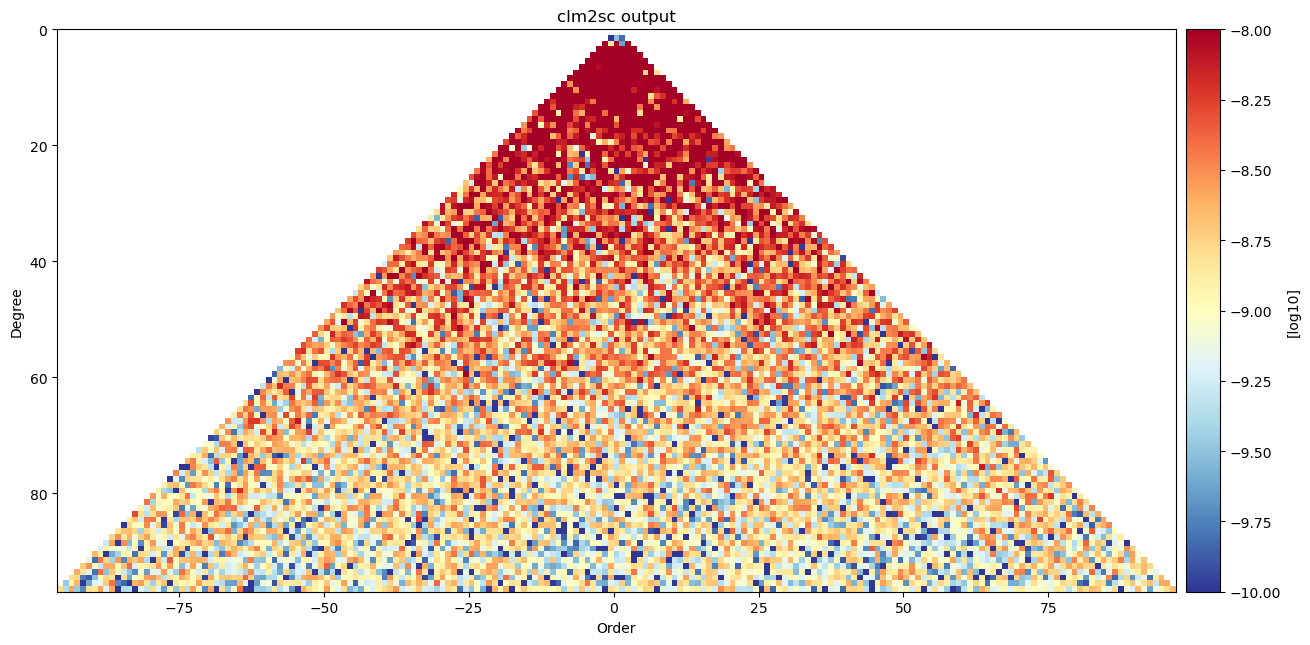

In [32]:
# creating a vector for labels
lmax = 96
xlabel_vec = np.arange(-lmax, lmax+1, 1)
ylabel_vec = np.arange(0, lmax+1, 1)
# plotting settings
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# making ploting canvas
fig, ax = plt.subplots(figsize=(15, 7.5))
im = plt.imshow(np.log10(np.abs(raw_sc[10, :, :])),cmap='RdYlBu_r', extent=[-lmax, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function

plt.xlabel("Order [m]")
plt.ylabel("Degre [n]")
plt.title("clm2sc output")

# zero divide error but something to start with
divider = make_axes_locatable(ax)
colorbar_axes = divider.append_axes("right",
                                    size="3%",
                                    pad=0.1)
mpl.rc('image', cmap='RdYlBu_r')

# Using new axes for colorbar
plt.colorbar(im, cax=colorbar_axes, label=f"[log10]")
plt.show()

In [94]:
help(pyshbundle.clm2sc.clm2sc)

Help on function clm2sc in module pyshbundle.clm2sc:

clm2sc(data)
    _summary_
    
    Args:
        data (_type_): _description_
    
    Returns:
        _type_: _description_



## Format Conversion

In [107]:
# the help on any function returns the docstrings
help(pyshbundle.clm2cs.clm2cs)

Help on function clm2cs in module pyshbundle.clm2cs:

clm2cs(data)
    _summary_
    
    Args:
        data (list): list containing [degree;  order; clm; slm; delta clm; delta slm; start data; end date]
    
    Returns:
        np.ndarray: Spherical Harmonic Coefficients in |C\S| format
    
    Suggestion: 
        Instead of printing "conversion complete" let's show a progress bar



In [34]:
# instead of working with /S|C\ format one can opt to convert the clm data file to |C\S| format
raw_cs = pyshbundle.clm2cs.clm2cs(sh_clm)

Conversion into clm format complete


In [12]:
# - month, degree, order
np.shape(raw_cs)

(201, 97, 97)

Here also similar to `clm2sc`; `clm2cs` also returns a 2-D matrix for each file (number of files = 201) stacked together

/media/abhishek/DATA/open_source/pyshbundle/notebooks/ipykernel_154002/3391347792.py:10: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(np.abs(raw_cs[10, :, :])),cmap='RdYlBu_r', extent=[0, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function


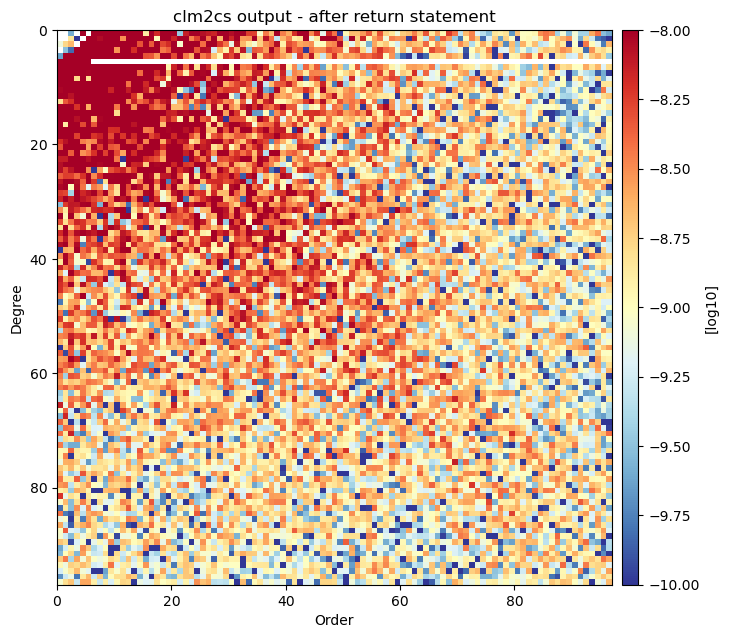

In [35]:
# Plotting the clm2cs output after adding return statement maybe some bug


# plotting settings
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# making ploting canvas
fig, ax = plt.subplots(figsize=(7.5, 7.5))
im = plt.imshow(np.log10(np.abs(raw_cs[10, :, :])),cmap='RdYlBu_r', extent=[0, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function

plt.xlabel("Order [m]")
plt.ylabel("Degre [n]")
plt.title("clm2cs output - after return statement")

# zero divide error but something to start with
divider = make_axes_locatable(ax)
colorbar_axes = divider.append_axes("right",
                                    size="3%",
                                    pad=0.1)

# Using new axes for colorbar
plt.colorbar(im, cax=colorbar_axes, label=f"[log10]")
plt.show()

Here seems some bug, There is a white band indicating 0 (Zero) value for the sine component part

In [11]:
# checking type
type(raw_sc)

numpy.ndarray

# sc 2 cs conversion

In [36]:
import pyshbundle.sc2cs

help(pyshbundle.sc2cs.sc2cs)

Help on function sc2cs in module pyshbundle.sc2cs:

sc2cs(field)
    converts the rectangular $(L+1)         imes (2L+1)$ matrix FIELD, containing
    spherical harmonics coefficients in /S|C\ storage format into a 
    square (L+1)x(L+1) matrix in |C\S| format.
    
    Parameters:
        field (numpy.ndarray()):
            the rectangular (L+1)x(2L+1) matrix FIELD, containing
            spherical harmonics coefficients in /S|C\ storage format
        
    Returns: 
        cs (numpy.ndarray): 
            square (L+1)x(L+1) matrix in |C\S| format
    
    References:
        See the SHBundle docs or PySHBundle docs for more info about SH coeff. storage and retrival formats being implementd.
    
    Examples:
        >>> cs_fmt = sc2cs(field)
        TO DO: show suitable output



In [38]:
# Converting sc  to cs format 
raw_cs2 = pyshbundle.sc2cs.sc2cs(raw_sc[10, :, :])

/media/abhishek/DATA/open_source/pyshbundle/notebooks/ipykernel_154002/2193795252.py:10: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(np.abs(raw_cs2[:, :])),cmap='RdYlBu_r', extent=[0, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function


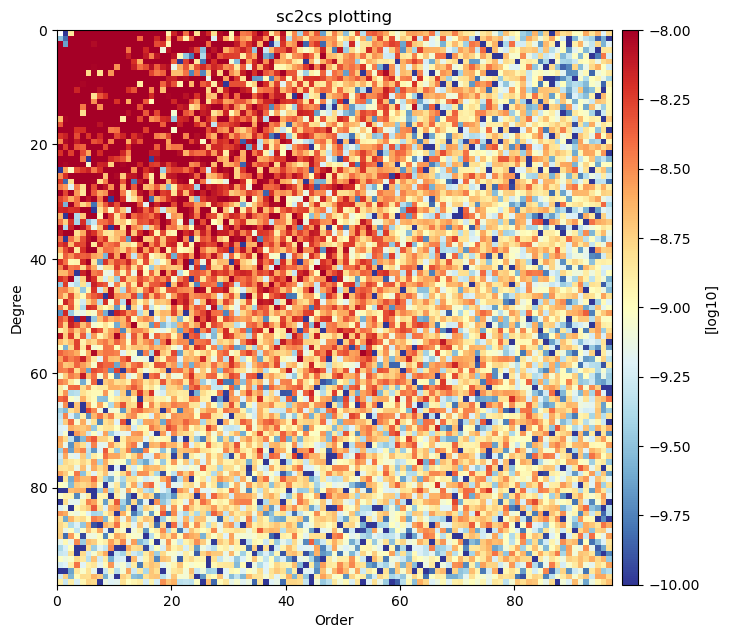

In [39]:
# Plotting the sc2cs output

# plotting settings
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

lmax=96
# making ploting canvas
fig, ax = plt.subplots(figsize=(7.5, 7.5))
im = plt.imshow(np.log10(np.abs(raw_cs2[:, :])),cmap='RdYlBu_r', extent=[0, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function

plt.xlabel("Order [m]")
plt.ylabel("Degre [n]")
plt.title("sc2cs plotting")

# zero divide error but something to start with
divider = make_axes_locatable(ax)
colorbar_axes = divider.append_axes("right",
                                    size="3%",
                                    pad=0.1)

# Using new axes for colorbar
plt.colorbar(im, cax=colorbar_axes, label=f"[log10]")
plt.show()

Suprisingly when converting the `/S|C\` format output of `clm2sc` into `|C\S|` format using the function `sc2cs` there is no white band at all.

# cs2sc Conversion - using the output of `clm2cs`

In [40]:
import pyshbundle.cs2sc
help(pyshbundle.cs2sc.cs2sc)

Help on function cs2sc in module pyshbundle.cs2sc:

cs2sc(field)
    converts the square (L+1)x(L+1) matrix 'field', containing
    spherical harmonics coefficients in |C\S| storage format into a 
    rectangular (L+1)x(2L+1) matrix in  /S|C\ format.
    
    Args:
        field (np.ndarray): the square (L+1)x(L+1) numpy matrix field , containing
                   spherical harmonics coefficients in |C\S| storage format
    
    Returns:
        numpy.ndarray: Rectangular (L+1)x(2L+1) numpy matrix in  /S|C\ format
    
    Raises:
        TypeError: Input neither in cs nor in sc format
    
    Todo:
        + Rather use TypeError instead of base Exception
    
    Examples:
        >>> sc_shcoeff = cs2sc(cs_shcoeff)
        TO DO: write the output



In [42]:
cs_sc_check = pyshbundle.cs2sc.cs2sc(raw_cs[10, :, :])

/media/abhishek/DATA/open_source/pyshbundle/notebooks/ipykernel_154002/2603446513.py:9: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(np.abs(cs_sc_check[:, :])),cmap='RdYlBu_r', extent=[-lmax, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function


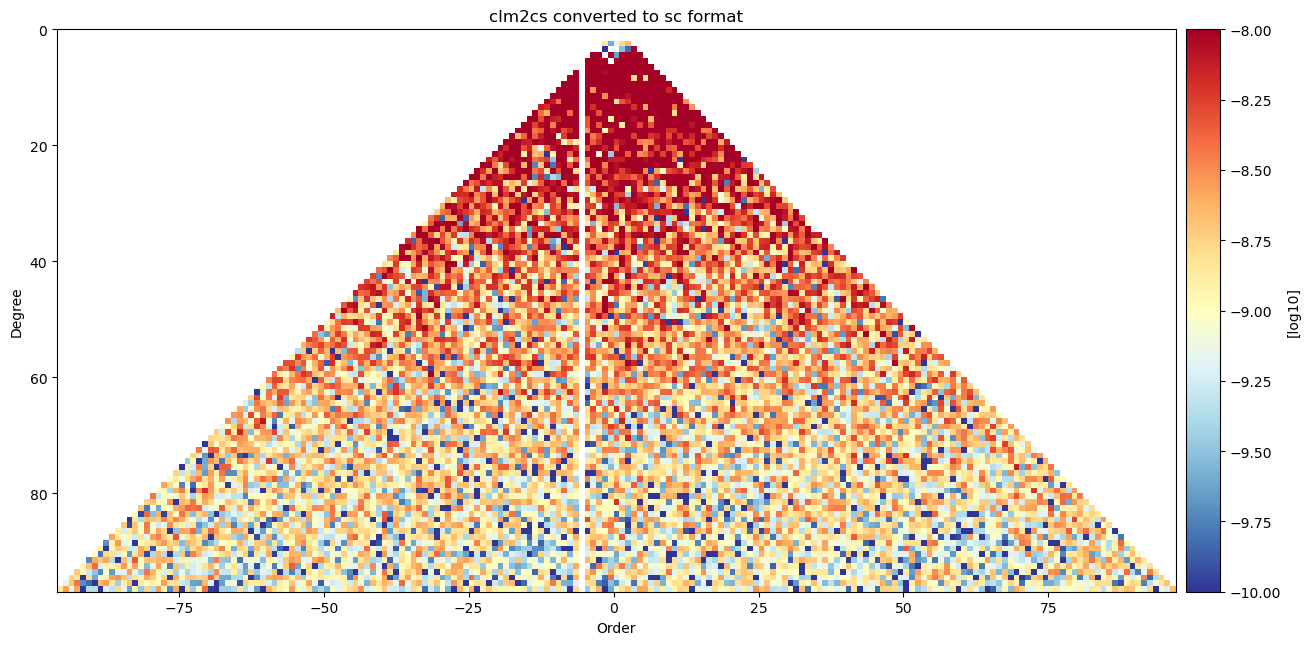

In [43]:
# creating a vector for labels
lmax = 96
# plotting settings
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# making ploting canvas
fig, ax = plt.subplots(figsize=(15, 7.5))
im = plt.imshow(np.log10(np.abs(cs_sc_check[:, :])),cmap='RdYlBu_r', extent=[-lmax, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function

plt.xlabel("Order [m]")
plt.ylabel("Degre [n]")
plt.title("clm2cs converted to sc format")

# zero divide error but something to start with
divider = make_axes_locatable(ax)
colorbar_axes = divider.append_axes("right",
                                    size="3%",
                                    pad=0.1)

# Using new axes for colorbar
plt.colorbar(im, cax=colorbar_axes, label=f"[log10]")
plt.show()

Again there is a wite band due to Zero issue. 

# Long Mean JPL

Data Source - /mnt/Data/pyshbundle/pyshbundle/pyshbundle/data/RL06_long_mean/SH_long_mean_jpl.npy

In [5]:
long_mean_jpl = '/media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/long_mean/SH_long_mean_jpl.npy'
SH_long_mean_jpl = np.load(long_mean_jpl)

/media/abhishek/DATA/open_source/pyshbundle/notebooks/ipykernel_154002/325116271.py:9: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(np.abs(SH_long_mean_jpl)),cmap='RdYlBu_r', extent=[-lmax, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function


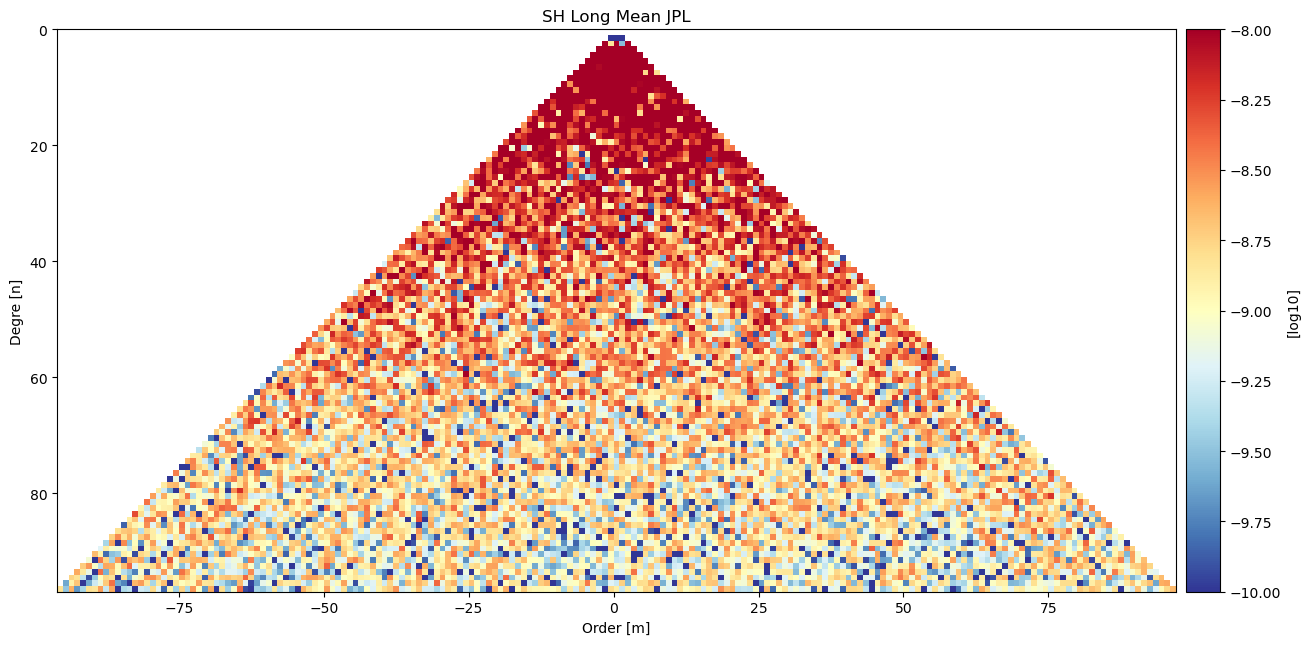

In [221]:
# creating a vector for labels
lmax = 96
# plotting settings
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# making ploting canvas
fig, ax = plt.subplots(figsize=(15, 7.5))
im = plt.imshow(np.log10(np.abs(SH_long_mean_jpl)),cmap='RdYlBu_r', extent=[-lmax, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function

plt.xlabel("Order [m]")
plt.ylabel("Degre [n]")
plt.title("SH Long Mean JPL")

# zero divide error but something to start with
divider = make_axes_locatable(ax)
colorbar_axes = divider.append_axes("right",
                                    size="3%",
                                    pad=0.1)

# Using new axes for colorbar
plt.colorbar(im, cax=colorbar_axes, label=f"[log10]")
plt.show()

# How to convert to klm?

In [16]:
import pyshbundle.klm2sc

help(pyshbundle.klm2sc.klm2sc)

Help on function klm2sc in module pyshbundle.klm2sc:

klm2sc(data)
    _summary_
    
    Args:
        data (_type_): _description_
    
    Returns:
        _type_: _description_



# Data Loading

In [50]:
file_list = os.listdir(path_sh)

In [51]:
path_sh

'/media/abhishek/DATA/open_source/pyshbundle/sample_input_data/JPL_input'

In [8]:
# file_list

In [54]:
# the files are sorted in the as per their dates
file_list[0][-39:-32]

'2002094'

In [55]:
file_path = "/media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/JPL_TN_files/TN-14_C30_C20_GSFC_SLR.txt"


# Main Functions

### Normal Gravity Field for standard Ellipsoids

In [56]:
import pyshbundle.normalklm

help(pyshbundle.normalklm.normalklm)

Help on function normalklm in module pyshbundle.normalklm:

normalklm(lmax: int, typ: str = 'wgs84')
    NORMALKLM returns an ellipsoidal normal field
    consisting of normalized -Jn, n=0,2,4,6,8
    
    Args:
        lmax (int): maximum degree
        typ (str): Ellipsoids can be either 
                    'wgs84' - World Geodetic System 84, 
                    'grs80' - , 
                    'he' - hydrostatic equilibrium ellipsoid
    
    Returns:
        nklm (np.array): normal field in CS-format (sparse array - [1, -J2, -J4, -J6, -J8])
    
    TODO: 
        Find type of nklm; I think raising TypeError, VlueError or NameError instad of general Exception
    
    Raises:
        TypeError: lmax should be an integer
        ValueError: lmax should be positive
        ValueError: Unknown type of ellipsoid, supports 'wgs84', `GRS80` and 'he'
    
    References:
        1. J2,J4 values for hydrostatic equilibrium ellipsoid from Lambeck (1988)
        "Geophysical Geodesy", p.18

In [58]:
# compute the mormal gravity field for grs80 ellipsoid
normal_cs = pyshbundle.normalklm.normalklm(lmax=97, typ='grs80')

# convert the format 
normal_sc = pyshbundle.cs2sc.cs2sc(normal_cs)

In [59]:
normal_sc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/media/abhishek/DATA/open_source/pyshbundle/notebooks/ipykernel_154002/3210120357.py:11: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(np.abs(normal_sc)),cmap='RdYlBu_r', extent=[-lmax, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function


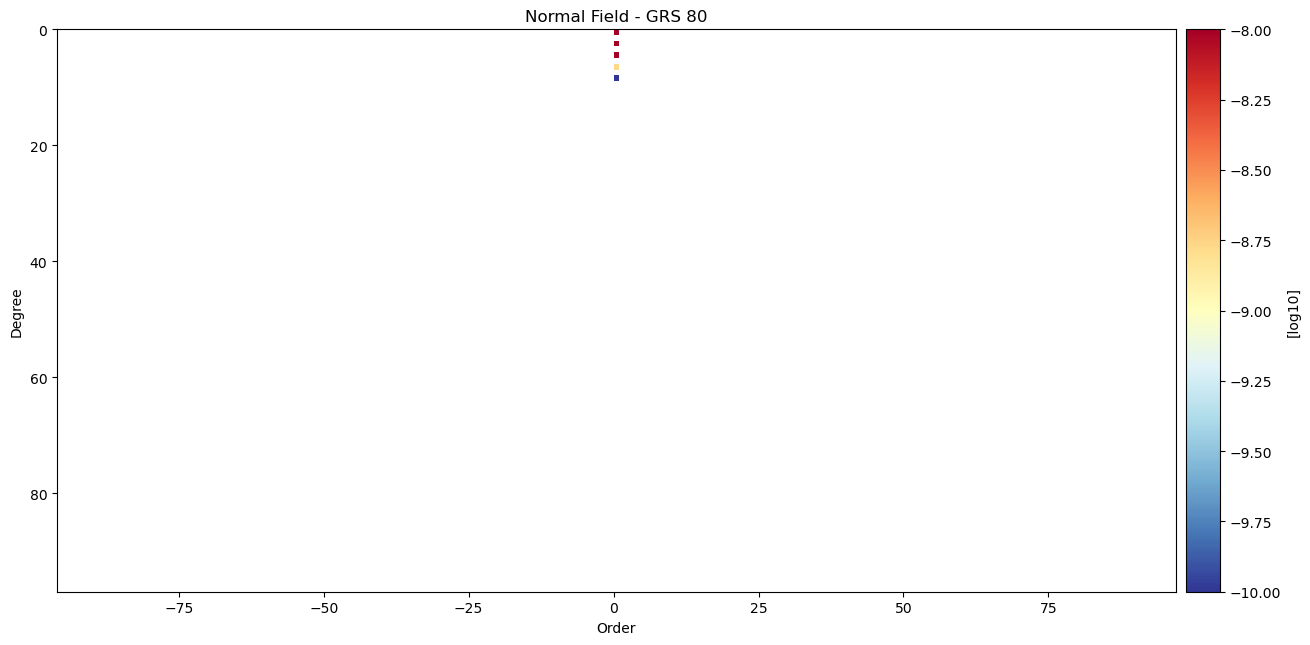

In [60]:
# visualize the normal field coefficients - matches with octave output

# creating a vector for labels
lmax = 96
# plotting settings
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# making ploting canvas
fig, ax = plt.subplots(figsize=(15, 7.5))
im = plt.imshow(np.log10(np.abs(normal_sc)),cmap='RdYlBu_r', extent=[-lmax, lmax+1, lamx+1, 0], vmax=-8, vmin=-10) # drawing the function

plt.xlabel("Order [m]")
plt.ylabel("Degre [n]")
plt.title("Normal Field - GRS 80")

# zero divide error but something to start with
divider = make_axes_locatable(ax)
colorbar_axes = divider.append_axes("right",
                                    size="3%",
                                    pad=0.1)

# Using new axes for colorbar
plt.colorbar(im, cax=colorbar_axes, label=f"[log10]")
plt.show()

Only zonal coefficients are required for normal field, rest is a sparse matrix.

### Global Spherical Harmonic Analysis

SH coeff -> TWSA

In [217]:
lmax = 96
gs = 3
half_rad_gf = 500

In [61]:
import pyshbundle.gshs
help(pyshbundle.gshs.gshs)

Help on function gshs in module pyshbundle.gshs:

gshs(field, quant='none', grd='mesh', n=-9999, h=0, jflag=1)
    GSHS - Global Spherical Harmonic Synthesis
    
    Args:
        field (_type_): set of SH coefficients, either in SC-triangle or CS-square format
        quant (str, optional): defining the field quantity. Defaults to 'none'.
        grd (str, optional): defining the grid. Defaults to 'mesh'.
        n (int, optional): _description_. Defaults to -9999.
        h (int, optional): _description_. Defaults to 0.
        jflag (int, optional): _description_. Defaults to 1.
    
    Returns:
        f (): the global field
        theRAD (): vector of co-latitudes [rad]
        lamRAD (): vector of longitudes [rad]
    
    Raises:
        Exception: Check format of the field
        Exception: n must be scalar
        Exception: n must be integer
        Exception: Grid argument must be string
        Exception: _description_
    
    Uses:
        `cs2sc`, `normalklm`, `plm`,

In [194]:
# computing arguments

lmax = 96
# grid size
gs = 2.5
quant = 'gravity' 
grd = 'cell'
n = int(180/gs) 
h = 0 
jflag = 0

grid_y = int(180/gs)
grid_x = int(360/gs)

# gravity field
normal_ff = pyshbundle.gshs.gshs(normal_sc, quant, grd, n, h, jflag)[0]

# computation
nlm_field = np.zeros([grid_y,grid_x], dtype ='longdouble')


nlm_field[:,0:int(grid_x/2)] = normal_ff[:,int(grid_x/2):]
nlm_field[:,int(grid_x/2):] = normal_ff[:,0:int(grid_x/2)]   


NameError: name 'normal_sc' is not defined

#### Using quant - geoid, potential, does not work - needs to be seen

In [196]:
gs = 2.5
lons = np.arange(-180, 180, gs)
lats = np.arange(-90, 90, gs)
x, y = np.meshgrid(lons, lats)

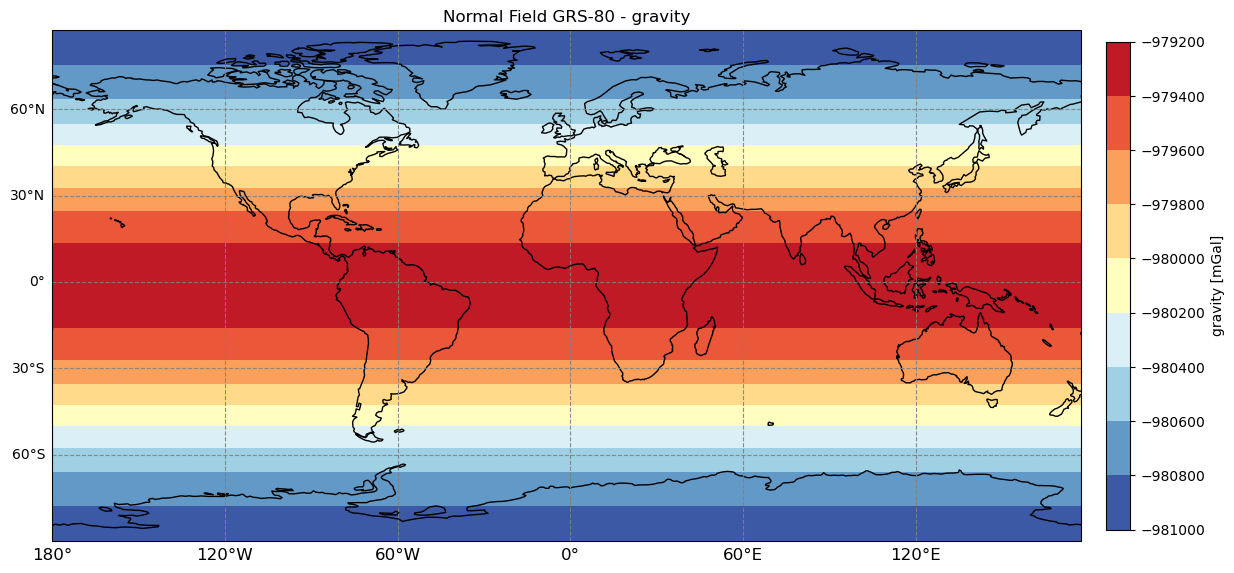

In [181]:
# Plotting and Visualization

fig = plt.figure(figsize=(16, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())
# plot the data
im = plt.contourf(x, y, nlm_field, cmap='RdYlBu_r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

# Using new axes for colorbar

plt.colorbar(shrink=0.845, orientation='vertical', pad=0.02,label=f"{quant} [mGal]")

plt.title(f"Normal Field GRS-80 - {quant}")

plt.show()

I guess data already has removed the normal field

In [222]:
## Visualize Long term fielf Field

lmax = 96
# grid size
gs = 2.5
quant = 'gravity' 
grd = 'cell'
n = int(180/gs) 
h = 0 
jflag = 0

grid_y = int(180/gs)
grid_x = int(360/gs)

# gravity field
long_tern_ff = pyshbundle.gshs.gshs(SH_long_mean_jpl, quant, grd, n, h, jflag)[0]

# computation
long_term_field = np.zeros([grid_y,grid_x], dtype ='longdouble')


long_term_field[:,0:int(grid_x/2)] = long_tern_ff[:,int(grid_x/2):]
long_term_field[:,int(grid_x/2):] = long_tern_ff[:,0:int(grid_x/2)]   

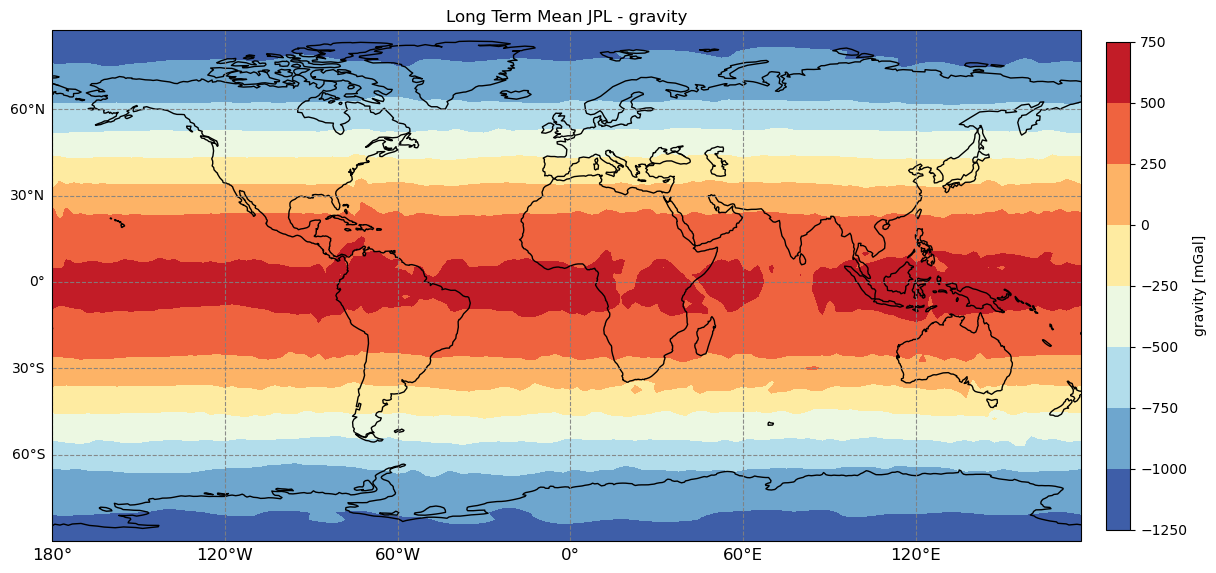

In [224]:
# Plotting and Visualization

fig = plt.figure(figsize=(16, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())
# plot the data
im = plt.contourf(x, y, long_term_field, cmap='RdYlBu_r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

# Using new axes for colorbar

plt.colorbar(shrink=0.845, orientation='vertical', pad=0.02,label=f"{quant} [mGal]")

plt.title(f"Long Term Mean JPL - {quant}")

plt.show()

In [182]:
# Computing the field for temoral gravity data

lmax = 96
gs = 2.5
quant = 'gravity' 
grd = 'cell'
n = int(180/gs) 
h = 0 
jflag = 0

grid_y = int(180/gs)
grid_x = int(360/gs)

grav_ff = pyshbundle.gshs.gshs(raw_sc[10, :, :], quant, grd, n, h, jflag)[0]

# Computation
grav_field = np.zeros([grid_y,grid_x], dtype ='longdouble')


grav_field[:,0:int(grid_x/2)] = grav_ff[:,int(grid_x/2):]
grav_field[:,int(grid_x/2):] = grav_ff[:,0:int(grid_x/2)]   


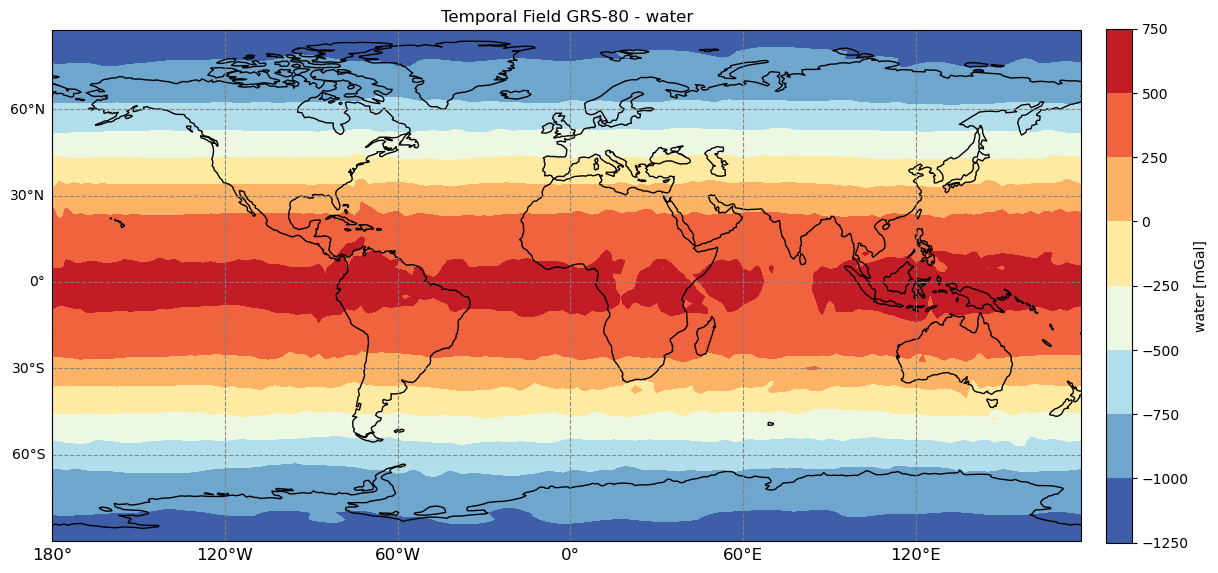

In [184]:
# Plotting and Visualization

fig = plt.figure(figsize=(16, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

# plot the data
im = plt.contourf(x, y, grav_field, cmap='RdYlBu_r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

# Using new axes for colorbar

plt.colorbar(shrink=0.89, orientation='vertical', pad=0.02,label=f"{quant} [mGal]")

plt.title(f"Temporal Field GRS-80 - {quant}")

plt.show()

In [225]:
# Substracting long term mean from temporal grav field
sub_sc = raw_sc[10, :, :] - SH_long_mean_jpl

lmax = 96
gs = 2.5
quant = 'gravity' 
grd = 'cell'
n = int(180/gs) 
h = 0 
jflag = 0

grid_y = int(180/gs)
grid_x = int(360/gs)

sub_grs80 = pyshbundle.gshs.gshs(sub_sc, quant, grd, n, h, jflag)[0]


# Computing
grav_sub_field = np.zeros([grid_y,grid_x], dtype ='longdouble')


grav_sub_field[:,0:int(grid_x/2)] = sub_grs80[:,int(grid_x/2):]
grav_sub_field[:,int(grid_x/2):] = sub_grs80[:,0:int(grid_x/2)]  

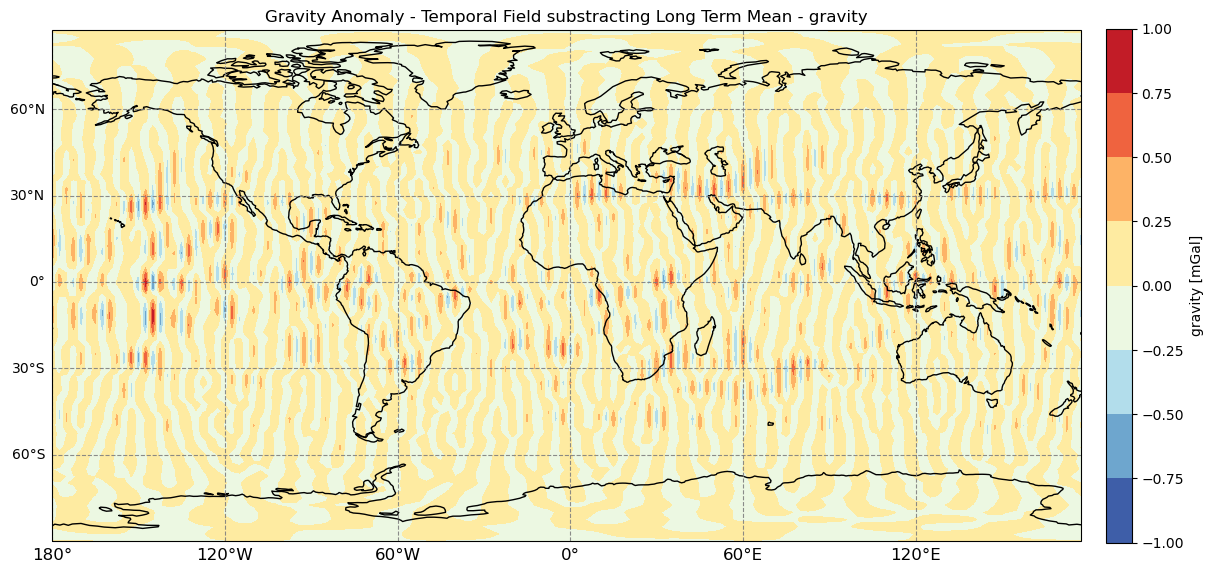

In [232]:
# Plotting and Visualization

fig = plt.figure(figsize=(16, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

# plot the data
im = plt.contourf(x, y, grav_sub_field, cmap='RdYlBu_r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

# Using new axes for colorbar

plt.colorbar(shrink=0.89, orientation='vertical', pad=0.02,label=f"{quant} [mGal]")

plt.title(f"Gravity Anomaly - Temporal Field substracting Long Term Mean - {quant}")

plt.show()

The GRACE Products suffer with the strip noise issue. Filtering needs to be done in order to remove the noise,

## Applying Gaussian Filter

In [228]:
# using gaussian filter
import pyshbundle.gaussian

W = pyshbundle.gaussian.gaussian(L=96, cap=500)

In [229]:
# For filtered field using gausian kernal 
lmax = 96
gs = 2.5
quant = 'gravity' 
grd = 'cell'
n = int(180/gs) 
h = 0 
jflag = 0

grid_y = int(180/gs)
grid_x = int(360/gs)

# filtered SH Coeff
shfil = np.zeros([lmax+1, 2 * lmax+1])

# applying filter on substracted coeff
for j in range(0,2*lmax+1,1):
    shfil[:,j] = W[:,0] * sub_sc[:,j]


flt_ff = pyshbundle.gshs.gshs(shfil, quant, grd, n, h, jflag)[0]

# Computing
grav_field_flt = np.zeros([grid_y,grid_x], dtype ='longdouble')


grav_field_flt[:,0:int(grid_x/2)] = flt_ff[:,int(grid_x/2):]
grav_field_flt[:,int(grid_x/2):] = flt_ff[:,0:int(grid_x/2)]  

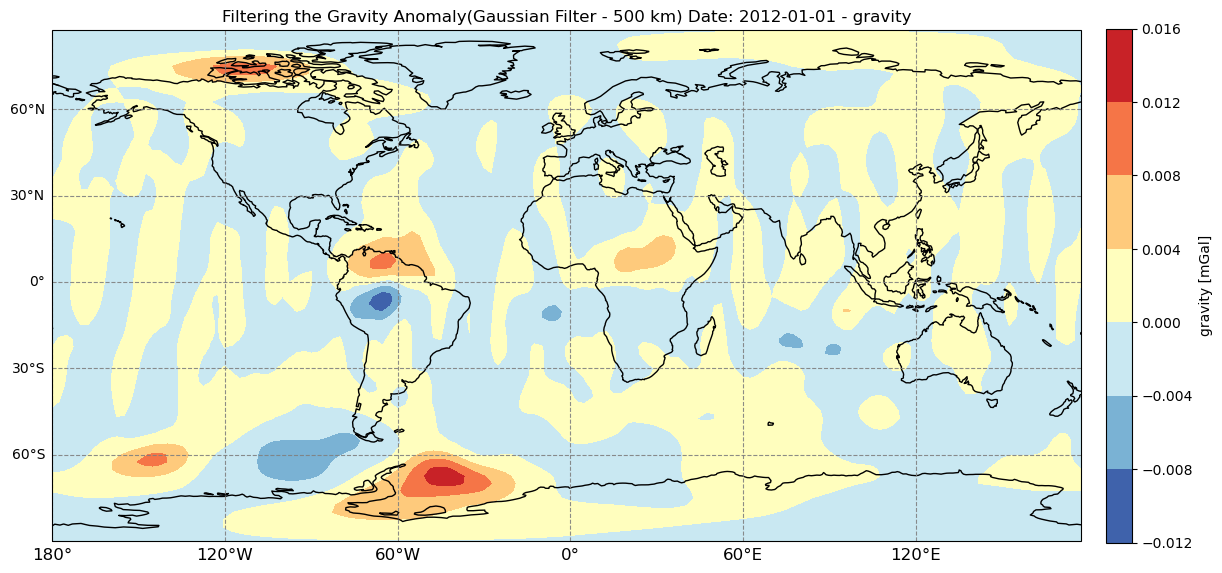

In [238]:
time_plot = start_date[10][0]

# Plotting and Visualization
fig = plt.figure(figsize=(16, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

# plot the data
im = plt.contourf(x, y, grav_field_flt, cmap='RdYlBu_r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

# Using new axes for colorbar

plt.colorbar(shrink=0.89, orientation='vertical', pad=0.02,label=f"{quant} [mGal]")

plt.title(f"Filtering the Gravity Anomaly(Gaussian Filter - 500 km) Date: {time_plot} - {quant}")

plt.show()

Signal over amazon, Northern Canada, Nile-Congo basin and Antarctica are prominant

### Doubts / Concerns



# Associated Legender Polynomial

In [20]:
import pyshbundle.plm
help(pyshbundle.plm.plm)

Help on function plm in module pyshbundle.plm:

plm(l: <built-in function array>, m: int, thetaRAD, nargin, nargout)
    PLM Fully normalized associated Legendre functions for a selected order M
    
    Args:
        l (np.array): Degree, but not necessarily monotonic.
               For l < m a vector of zeros will be returned.
        m (int): order (scalar). If absent, m = 0 is assumed.
        thetaRAD (np.array): co-latitude [rad] (vector)
        nargin (int): number of input argument
        nargout (int): number of output argument
    Returns:
        (np.array): PLM fully normalized



In [21]:
#
l = np.zeros((1,1))
l[0] = 7

l2 = np.zeros((1,1))
l2[0] = 7
n = [0, 7, 14, 20]
colatitude = np.deg2rad(np.arange(0, 180.5, 0.5))
lon = np.deg2rad(np.arange(-180, 180.5, 0.5))

In [198]:
print(l)

[[7.]]


In [199]:
# computing polynomial 
plm_7_0 = pyshbundle.plm.plm(l=l, m=0, thetaRAD=colatitude, nargin=1, nargout=1)
plm_7_4 = pyshbundle.plm.plm(l=l2, m=4, thetaRAD=colatitude, nargin=1, nargout=1)
plm_7_7 = pyshbundle.plm.plm(l=l2, m=7, thetaRAD=colatitude, nargin=1, nargout=1)

In [200]:
plm_7_0.shape

(361, 1, 1)

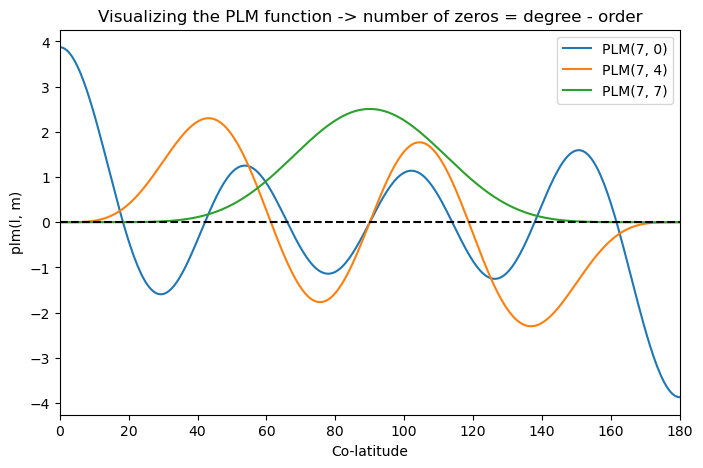

In [206]:
# Plotting the plm 
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(np.rad2deg(colatitude), plm_7_0[:, 0, 0], label="PLM(7, 0)")
plt.plot(np.rad2deg(colatitude), plm_7_4[:, 0, 0], label="PLM(7, 4)")
plt.plot(np.rad2deg(colatitude), plm_7_7[:, 0, 0], label="PLM(7, 7)")

plt.hlines(y=0, xmin=0, xmax=180, linestyles='--', colors='k')
plt.xlim([0, 180])
plt.legend()

plt.title("Visualizing the PLM function -> number of zeros = degree - order")
plt.xlabel("Co-latitude")
plt.ylabel("plm(l, m)")

plt.show()

## Even and Odd degree Legendre Polynomials

## Compute Zero's of Legendre polinomials

In [8]:
import pyshbundle.grule
help(pyshbundle.grule.grule)

Help on function grule in module pyshbundle.grule:

grule(n: int)
    This function computes Gauss base points and weight factors
    using the algorithm-see Reference
    
    Args:
        n (int): number of base points required
    
    Returns:
        np.array: cosine of the base points
        np.array: weight factors for computing integrals and such
    
    References:
        1. 'Methods of Numerical Integration' by Davis and Rabinowitz, page 365, Academic Press, 1975.
    
    Example:
        >>> bp, wf = grule(n)
        TO DO: write suitable output



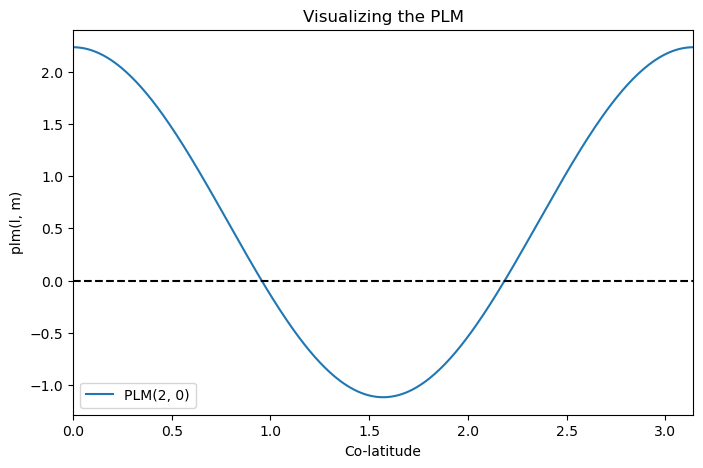

In [57]:
# the plm implementation using a co-latitude vector (geodetic use-case)
l = np.zeros((1,1))
l[0] = 2
colatitude = np.deg2rad(np.arange(0, 180.5, 0.5))

plm_2_0 = pyshbundle.plm.plm(l=l, m=0, thetaRAD=colatitude, nargin=1, nargout=1)

# Plotting the plm 
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot((colatitude), plm_2_0[:, 0, 0], label="PLM(2, 0)")

plt.hlines(y=0, xmin=0, xmax=3.14, linestyles='--', colors='k')
plt.xlim([0, 3.14])
plt.legend()

plt.title("Visualizing the PLM")
plt.xlabel("Co-latitude")
plt.ylabel("plm(l, m)")

plt.show()


In [59]:
bp, wf = pyshbundle.grule.grule(n=2)

In [60]:
len(bp)

2

In [61]:
bp

array([-0.57735027,  0.57735027])

In [62]:
np.sqrt(1/3)

0.5773502691896257

In [17]:
wf

array([1., 1.])

## Check Orthogonality of Spherical Harmonic Coefficients

Refering to Stack Overflow post - https://stackoverflow.com/questions/39537794/orthogonality-issue-in-scipys-legendre-polynomials

Great GitHub Repo by @markmbaum for 2-D Orthogonal Spherical Harmonic. Find the docs for `orthopoly` - https://markmbaum.github.io/orthopoly/

## Visualizing the orthogonality of Legendre Polynomial

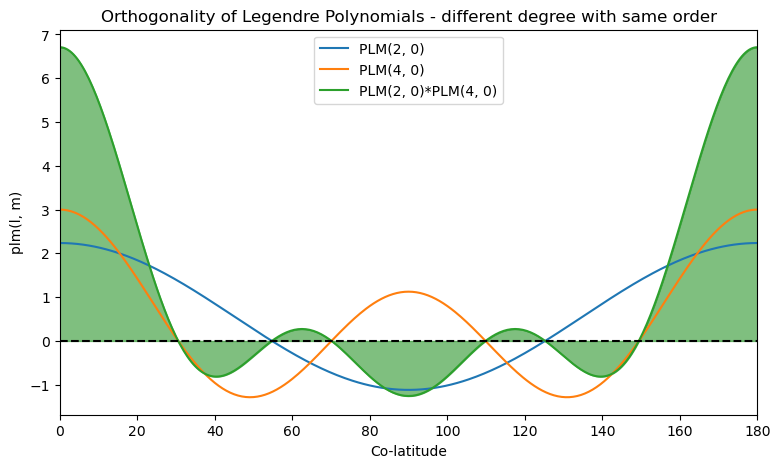

In [74]:
# the plm implementation using a co-latitude vector (geodetic use-case)
l1 = np.zeros((1,1))
l1[0] = 2

l2 = np.zeros((1,1))
l2[0] = 4


colatitude = np.deg2rad(np.arange(0, 180.5, 0.5))

plm_2_0 = pyshbundle.plm.plm(l=l1, m=0, thetaRAD=colatitude, nargin=1, nargout=1)
plm_4_0 = pyshbundle.plm.plm(l=l2, m=0, thetaRAD=colatitude, nargin=1, nargout=1)

product_2_4 = plm_2_0*plm_4_0

# Plotting the plm 
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(np.rad2deg(colatitude), plm_2_0[:, 0, 0], label="PLM(2, 0)")
plt.plot(np.rad2deg(colatitude), plm_4_0[:, 0, 0], label="PLM(4, 0)")

plt.plot(np.rad2deg(colatitude), product_2_4[:, 0, 0], label="PLM(2, 0)*PLM(4, 0)")

plt.fill_between(np.rad2deg(colatitude),product_2_4[:, 0, 0],color='green',alpha=0.5)

plt.hlines(y=0, xmin=0, xmax=180, linestyles='--', colors='k')
plt.xlim([0, 180])
plt.legend()

plt.title("Orthogonality of Legendre Polynomials - different degree with same order")
plt.xlabel("Co-latitude")
plt.ylabel("plm(l, m)")

plt.show()

It can be observed that the product of PLM(2,0) and PLM4(4,0) yields a output symmetric about X-axis and also about co-latitude = 90 deg. Thus area under 
the plot turns out to be zero -> both are orthogonal functions

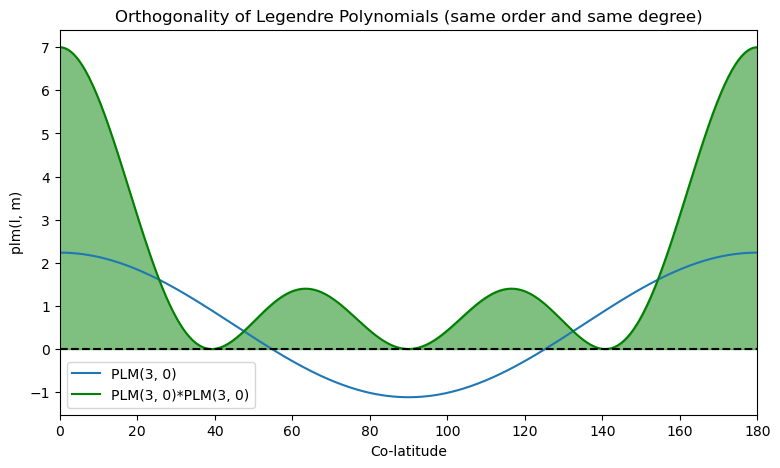

In [75]:
# the plm implementation using a co-latitude vector (geodetic use-case)

l3 = np.zeros((1,1))
l3[0] = 3

colatitude = np.deg2rad(np.arange(0, 180.5, 0.5))

plm_3_0 = pyshbundle.plm.plm(l=l3, m=0, thetaRAD=colatitude, nargin=1, nargout=1)

product_3_3 = plm_3_0*plm_3_0

# Plotting the plm 
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(np.rad2deg(colatitude), plm_2_0[:, 0, 0], label="PLM(3, 0)")

plt.plot(np.rad2deg(colatitude), product_3_3[:, 0, 0], label="PLM(3, 0)*PLM(3, 0)", color='green')

plt.fill_between(np.rad2deg(colatitude),product_3_3[:, 0, 0],color='green',alpha=0.5)

plt.hlines(y=0, xmin=0, xmax=180, linestyles='--', colors='k')
plt.xlim([0, 180])
plt.legend()

plt.title("Orthogonality of Legendre Polynomials (same order and same degree)")
plt.xlabel("Co-latitude")
plt.ylabel("plm(l, m)")

plt.show()

In this case the integral cannot be zero, its some finite positive quantity.

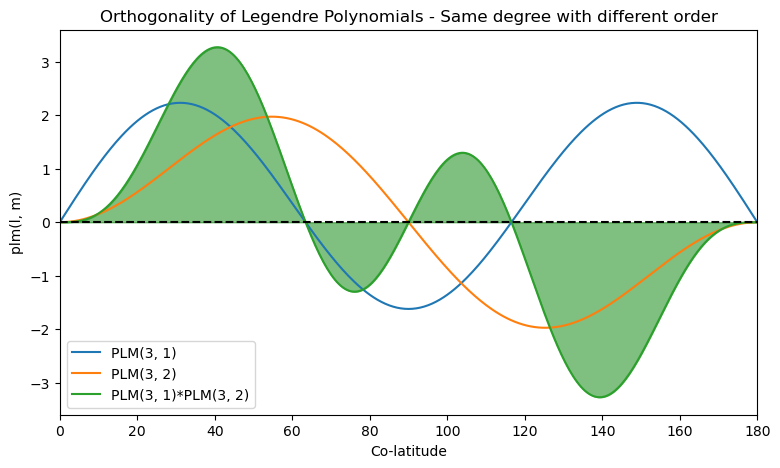

In [80]:
# the plm implementation using a co-latitude vector (geodetic use-case)
l1 = np.zeros((1,1))
l1[0] = 3

l2 = np.zeros((1,1))
l2[0] = 3


colatitude = np.deg2rad(np.arange(0, 180.5, 0.5))

plm_3_1 = pyshbundle.plm.plm(l=l1, m=1, thetaRAD=colatitude, nargin=1, nargout=1)
plm_3_0 = pyshbundle.plm.plm(l=l2, m=2, thetaRAD=colatitude, nargin=1, nargout=1)

product_33_10 = plm_3_1*plm_3_0

# Plotting the plm 
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(np.rad2deg(colatitude), plm_3_1[:, 0, 0], label="PLM(3, 1)")
plt.plot(np.rad2deg(colatitude), plm_3_0[:, 0, 0], label="PLM(3, 2)")

plt.plot(np.rad2deg(colatitude), product_33_10[:, 0, 0], label="PLM(3, 1)*PLM(3, 2)")

plt.fill_between(np.rad2deg(colatitude),product_33_10[:, 0, 0],color='green',alpha=0.5)

plt.hlines(y=0, xmin=0, xmax=180, linestyles='--', colors='k')
plt.xlim([0, 180])
plt.legend()

plt.title("Orthogonality of Legendre Polynomials - Same degree with different order")
plt.xlabel("Co-latitude")
plt.ylabel("plm(l, m)")

plt.show()

Orthogonality holds even for same degree but different order

## Power Spectrum of Spherical Harmonics

## Surface Spherical Harmonics Plot

similar to the plm and plmplot in SHBundle

$$

$$

In [137]:
import pyshbundle.plm

def surface_spherical_hormonics(l: int, m: int):
    """_summary_

    Args:
        l (int): Degree
        m (int): Order

    Returns:
        _type_: _description_
    """

    # input handling
    assert l >= 0

    assert m >= 0

    assert m <= l

    # main code
    thetaRAD  = np.linspace(0,np.pi,37)
    lambdaRAD = np.linspace(0,2*np.pi,73)

    cosml = np.cos(m*lambdaRAD)
    sinml = np.sin(m*lambdaRAD)

    arr = np.zeros((1,1))
    arr[0] = l
    
    
    p = pyshbundle.plm.plm(arr, m, thetaRAD, nargin=1, nargout=1)

    ylmc = p * cosml
    ylms = p * sinml

    return (ylmc, ylms)

In [150]:
ylmc, ylms = surface_spherical_hormonics(l=2, m=1)

In [149]:
ylmc.shape

(37, 1, 73)

In [134]:
np.linspace(0,np.pi,37)

37

In [ ]:
l = 2
m = 1


nlam   = min(400,(abs(m)+1)*100)
ntet   = min(200,(l-abs(m)+2)*50)

lmbda = np.linspace(-np.pi,np.pi,nlam)
theta  = np.linspace(0,np.pi,ntet)'

[Lam,The] = np.meshgrid(lmbda,theta)

[X,Y,Z] = sph2cart(Lam, np.pi/2-The,1);
hs   = surf(X,Y,Z,y); shading interp;
axis equal; axis off;
lamTitle = true;

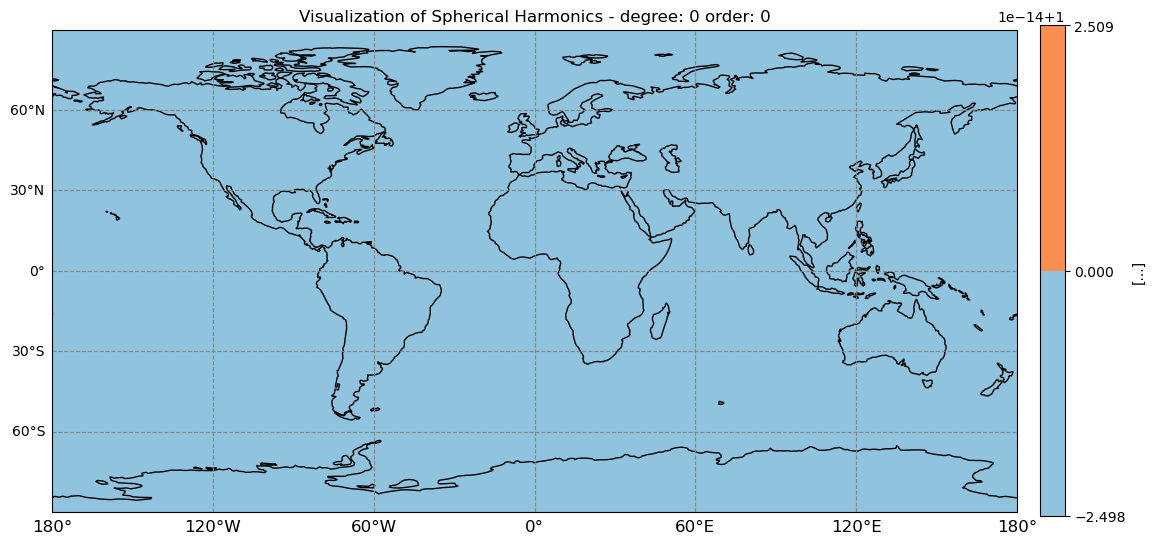

In [207]:
# basic plotting of SH coeff on plane
l = 0
m = 0

ylmc, ylms = surface_spherical_hormonics(l=l, m=m)

fig = plt.figure(figsize=(15, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

lons = np.linspace(-180, 180, 73)
lats = np.linspace(-90, 90, 37)

x, y = np.meshgrid(lons, lats)

if m >=0 :
    plt.contourf(x, y, ylmc[:, 0, :], cmap='RdYlBu_r')
else:
    plt.contourf(x, y, ylms[:, 0, :], cmap='RdYlBu_r')


# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

plt.colorbar(orientation='vertical', shrink=0.85, pad=0.02,label=f"[...]")

plt.title(f"Visualization of Spherical Harmonics - degree: {l} order: {m}")
plt.show()


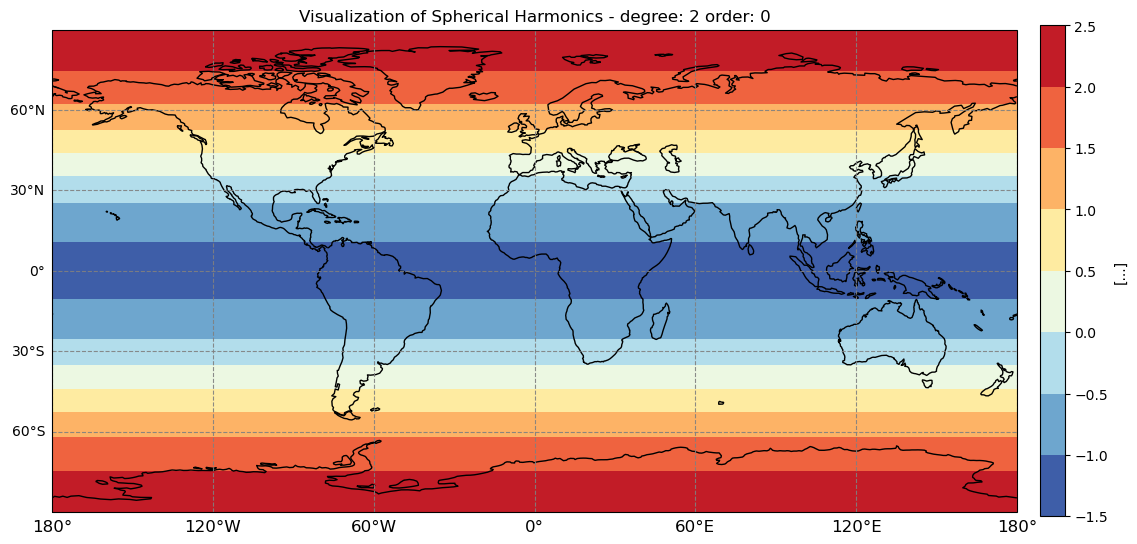

In [217]:
# basic plotting of SH coeff on plane - Zonal
l = 2
m = 0

ylmc, ylms = surface_spherical_hormonics(l=l, m=m)

fig = plt.figure(figsize=(15, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

lons = np.linspace(-180, 180, 73)
lats = np.linspace(-90, 90, 37)

x, y = np.meshgrid(lons, lats)

if m >= 0 :
    plt.contourf(x, y, ylmc[:, 0, :], cmap='RdYlBu_r')
else:
    plt.contourf(x, y, ylms[:, 0, :], cmap='RdYlBu_r')


# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

plt.colorbar(orientation='vertical', shrink=0.85, pad=0.02,label=f"[...]")

plt.title(f"Visualization of Spherical Harmonics - degree: {l} order: {m}")
plt.show()


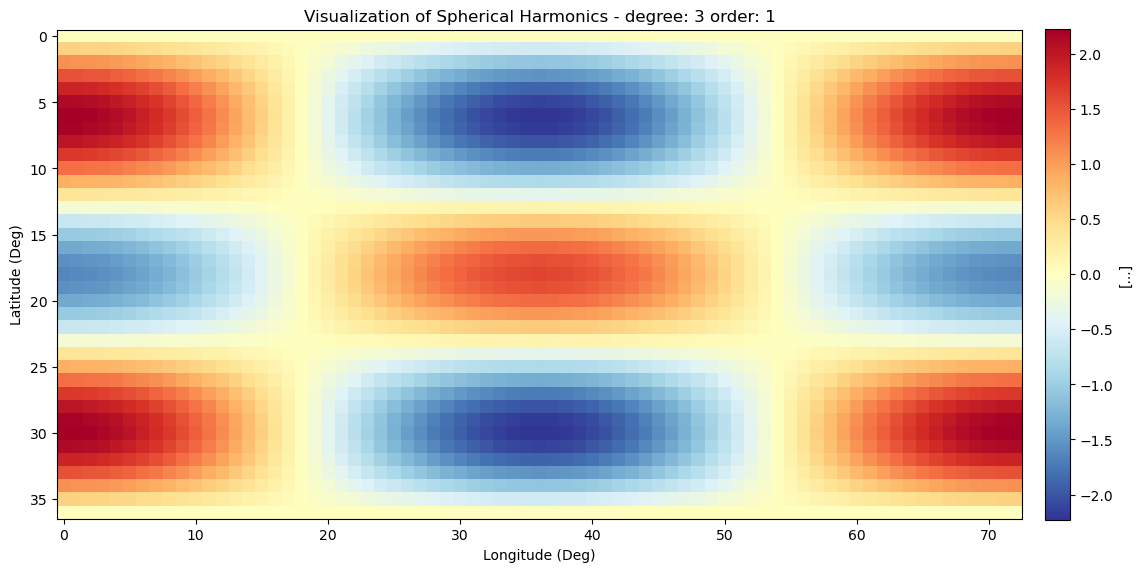

In [210]:
# basic plotting of SH coeff on plane - Teseral

l = 3
m = 1

ylmc, ylms = surface_spherical_hormonics(l=l, m=m)

fig, ax = plt.subplots(figsize=(15, 7.5))
nlam   = min(400,(abs(m)+1)*100)
ntet   = min(200,(l-abs(m)+2)*50)

lmbda = np.linspace(-np.pi,np.pi,nlam)
theta  = np.linspace(0,np.pi,ntet)
if m >=0 :
    plt.imshow(ylmc[:, 0, :], cmap='RdYlBu_r')
else:
    plt.imshow(ylms[:, 0, :])

plt.colorbar(orientation='vertical', shrink=0.85, pad=0.02,label=f"[...]")

plt.xlabel("Longitude (Deg)")
plt.ylabel("Latitude (Deg)")

plt.title(f"Visualization of Spherical Harmonics - degree: {l} order: {m}")
plt.show()



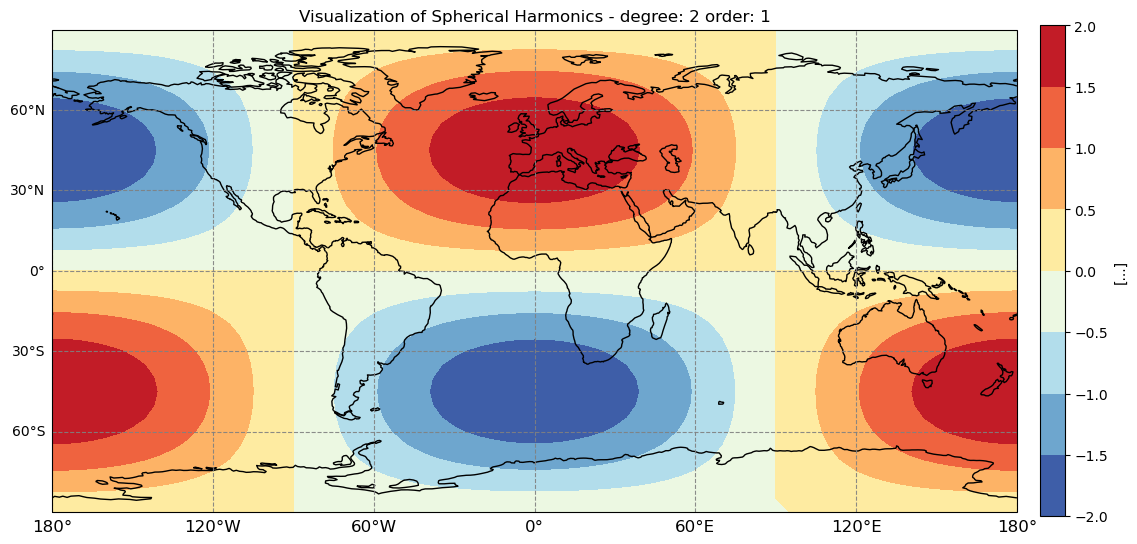

In [212]:
# basic plotting of SH coeff on plane - Teseral
l = 2
m = 1

ylmc, ylms = surface_spherical_hormonics(l=l, m=m)

fig = plt.figure(figsize=(15, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

lons = np.linspace(-180, 180, 73)
lats = np.linspace(-90, 90, 37)

x, y = np.meshgrid(lons, lats)

if m >=0 :
    plt.contourf(x, y, ylmc[:, 0, :], cmap='RdYlBu_r')
else:
    plt.contourf(x, y, ylms[:, 0, :], cmap='RdYlBu_r')


# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

plt.colorbar(orientation='vertical', shrink=0.85, pad=0.02,label=f"[...]")

plt.title(f"Visualization of Spherical Harmonics - degree: {l} order: {m}")
plt.show()


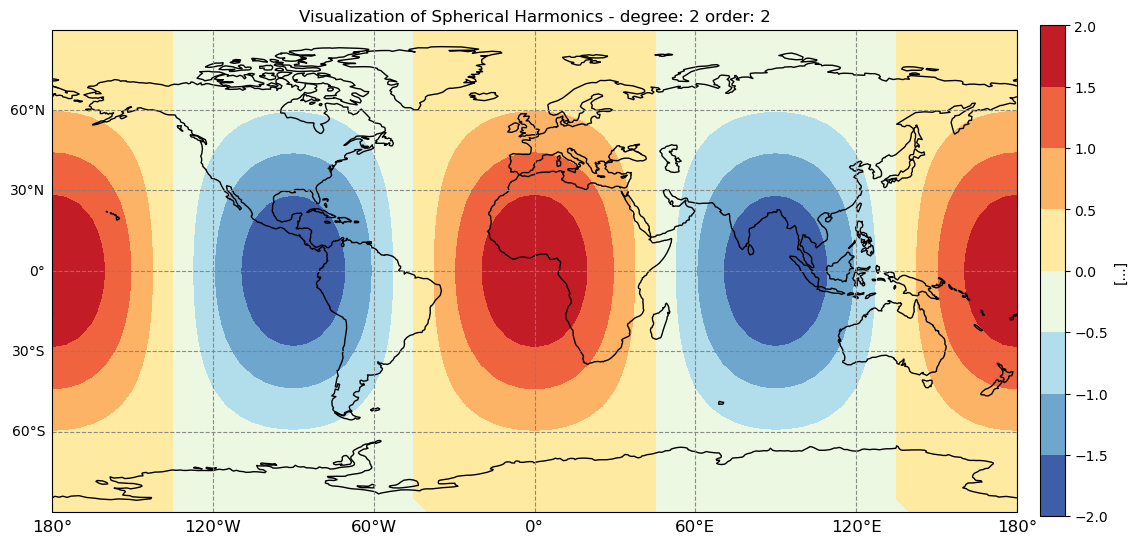

In [213]:
# basic plotting of SH coeff on plane - Sectoral
l = 2
m = 2

ylmc, ylms = surface_spherical_hormonics(l=l, m=m)

fig = plt.figure(figsize=(15, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

lons = np.linspace(-180, 180, 73)
lats = np.linspace(-90, 90, 37)

x, y = np.meshgrid(lons, lats)

if m >=0 :
    plt.contourf(x, y, ylmc[:, 0, :], cmap='RdYlBu_r')
else:
    plt.contourf(x, y, ylms[:, 0, :], cmap='RdYlBu_r')


# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

plt.colorbar(orientation='vertical', shrink=0.85, pad=0.02,label=f"[...]")

plt.title(f"Visualization of Spherical Harmonics - degree: {l} order: {m}")
plt.show()
